# ACSE-3 (Numerical Methods) <a class="tocSkip">

## Lecture 10: Finite volume methods (FVM) <a class="tocSkip">
    
### Homework exercises - solutions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Burgers'-equation-in-conservative-vs-advective-form" data-toc-modified-id="Homework---Burgers'-equation-in-conservative-vs-advective-form-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Burgers' equation in conservative vs advective form</a></span><ul class="toc-item"><li><span><a href="#Solution---Burgers'-equation-in-conservative-vs-advective-form" data-toc-modified-id="Solution---Burgers'-equation-in-conservative-vs-advective-form-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Solution - Burgers' equation in conservative vs advective form</a></span></li></ul></li><li><span><a href="#Homework---Lax-Friedrichs-for-pure-advection" data-toc-modified-id="Homework---Lax-Friedrichs-for-pure-advection-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Lax-Friedrichs for pure advection</a></span><ul class="toc-item"><li><span><a href="#Solution---Lax-Friedrichs-for-pure-advection" data-toc-modified-id="Solution---Lax-Friedrichs-for-pure-advection-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Solution - Lax-Friedrichs for pure advection</a></span></li></ul></li><li><span><a href="#Homework---Lax-Wendroff-for-a-general-conservation-law-[$\star$]" data-toc-modified-id="Homework---Lax-Wendroff-for-a-general-conservation-law-[$\star$]-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Lax-Wendroff for a general conservation law [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Lax-Wendroff-for-a-general-conservation-law" data-toc-modified-id="Solution---Lax-Wendroff-for-a-general-conservation-law-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Solution - Lax-Wendroff for a general conservation law</a></span></li></ul></li><li><span><a href="#Homework---Implement-a-finite-volume-based-upwind-method" data-toc-modified-id="Homework---Implement-a-finite-volume-based-upwind-method-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Implement a finite volume based upwind method</a></span><ul class="toc-item"><li><span><a href="#Solution---Implement-a-finite-volume-based-upwind-method" data-toc-modified-id="Solution---Implement-a-finite-volume-based-upwind-method-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Solution - Implement a finite volume based upwind method</a></span></li></ul></li><li><span><a href="#Homework---Checking-for-consistency-between-FD-and-FV-implementations-of-LF-in-1D-[$\star$]" data-toc-modified-id="Homework---Checking-for-consistency-between-FD-and-FV-implementations-of-LF-in-1D-[$\star$]-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Homework - Checking for consistency between FD and FV implementations of LF in 1D [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Checking-for-consistency-between-FD-and-FV-implementations-in-1D" data-toc-modified-id="Solution---Checking-for-consistency-between-FD-and-FV-implementations-in-1D-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Solution - Checking for consistency between FD and FV implementations in 1D</a></span></li></ul></li><li><span><a href="#Homework---Compare-FV-based-UW,-LF,-LFF--[$\star$]" data-toc-modified-id="Homework---Compare-FV-based-UW,-LF,-LFF--[$\star$]-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Homework - Compare FV based UW, LF, LFF  [$\star$]</a></span><ul class="toc-item"><li><span><a href="#Solution---Compare-FV-based-UW,-LF,-LFF" data-toc-modified-id="Solution---Compare-FV-based-UW,-LF,-LFF-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solution - Compare FV based UW, LF, LFF</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%precision 3
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# Homework


## Homework - Burgers' equation in conservative vs advective form

[NB. the first parts of this question is cut and paste from the lecture].

Recall the inviscid form of Burgers' equation

$$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0,$$

[and recall further that we could only solve this problem in previous lectures if we assumed the viscous form (i.e. added some explicit diffusion), or if we used an upwind rather than a central difference based discretisation].

Notice that this problem can also be written as a conservation law $\,(u_t+f_x=0)\,$ with 

$$ f(u) = \frac{1}{2} u^2. $$

In the continuous world (i.e. before we discretise) these two forms are equivalent.  So does it matter which we base our discretisation on?

The answer is yes, for certain problems, such as those involving shocks. 

Let's demonstrate this with an example.

Consider Burgers' equation in the unit interval with the initial condition that the solution $u$ is equal to one for $x<0.5$ and $u$ is equal to zero for $x>0.5$.

For simplicity let's assume use of forward Euler in time and consider three ways to discretise the spatial derivative term:

**Discretisation 1**

Building on previous lectures the obvious discretisation for the advective form of the problem is the upwind scheme:

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} + u_i^{n}\frac{u_i^{n} - u_{i-1}^{n}}{\Delta x}=0.$$


**Discretisation 2**

If we instead perform an upwind discretisation of the conservative form of the problem we have

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} + \frac{\frac{1}{2}\left(u_i^{n}\right)^2 - \frac{1}{2}\left(u_{i-1}^{n}\right)^2}{\Delta x}=0.$$


**Discretisation 3**

In this version of the non-conservative based discretisation let's use an average to give is the advective velocity (note for this simple example/flux function, this is actually equivalent to the conservative form)

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} + \frac{u_i^{n} + u_{i-1}^{n}}{2} \frac{u_i^{n} - u_{i-1}^{n}}{\Delta x}=0.$$



**Discretisation 4**

We could also test a centred scheme while we're here:

$$\frac{u_i^{n+1} - u_i^{n}}{\Delta t} + u_i^{n}\frac{u_{i+1}^{n} - u_{i-1}^{n}}{2\Delta x}=0.$$



<br>

Implement and compare all of these methods on the problem we considered at the start of the lecture. 

### Solution - Burgers' equation in conservative vs advective form

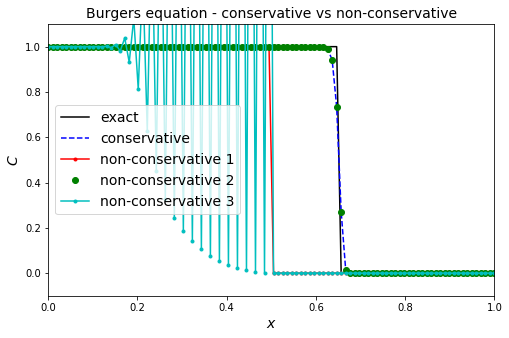

In [2]:
# define spatial mesh
L = 1
N = 100
dx = L / N
x = np.linspace(0, L, N)

# time step 
dt = 0.001
tend = 0.3
t = np.arange(0, tend, dt)

# set up a matrix to store the discrete solution in space-time 
# for our three discretisations
C_cons = np.zeros((len(x), len(t)))
C_noncons1 = np.zeros((len(x), len(t)))
C_noncons2 = np.zeros((len(x), len(t)))
C_noncons3 = np.zeros((len(x), len(t)))

# define an initial condition
C_cons[x < 0.5, 0] = 1.0
C_noncons1[x < 0.5, 0] = 1.0
C_noncons2[x < 0.5, 0] = 1.0
C_noncons3[x < 0.5, 0] = 1.0

# time step
for n in range(len(t)-1):
    # conservative scheme - internal discretisation and then the two BC values
    C_cons[1:, n+1] = C_cons[1:, n] - (dt / dx) * ( 0.5 * C_cons[1:, n]**2 - 0.5 * C_cons[:-1, n]**2 )  
    C_cons[0,n+1] = C_cons[0,0]
    # non-conservative scheme (ver 1) - internal discretisation and then the two BC values
    C_noncons1[1:, n+1] = C_noncons1[1:, n] - (dt / dx) * C_noncons1[1:, n] * ( 
         C_noncons1[1:, n] -   C_noncons1[:-1, n] )  
    C_noncons1[0,n+1] = C_noncons1[0,0]
    # non-conservative scheme (ver 2) - internal discretisation and then the two BC values
    C_noncons2[1:, n+1] = C_noncons2[1:, n] - (dt / dx) * (
        0.5* ( C_noncons2[1:, n] + C_noncons2[:-1, n] ) * ( 
         C_noncons2[1:, n] -  C_noncons2[:-1, n] ) )
    C_noncons2[0,n+1] = C_noncons2[0,0]   
    # non-conservative scheme (ver 2) - internal discretisation and then the two BC values
    C_noncons3[1:-1, n+1] = C_noncons3[1:-1, n] - (dt / dx) * (
         C_noncons3[1:-1, n] * 0.5*( 
         C_noncons3[2:, n] -  C_noncons3[:-2, n] ) )
    C_noncons3[0,n+1] = C_noncons3[0,0] 
    C_noncons3[-1,n+1] = C_noncons3[-1,0] 
    
# set up figure
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$C$', fontsize=14)
ax1.set_title('Burgers equation - conservative vs non-conservative', fontsize=14)

ax1.plot(x,(x < (0.5 + 0.5 * tend)), 'k-', label = 'exact')
ax1.plot(x, C_cons[:, -1], 'b--', label='conservative')
ax1.plot(x, C_noncons1[:, -1], 'r.-', label='non-conservative 1')
ax1.plot(x, C_noncons2[:, -1], 'go', label='non-conservative 2')
ax1.plot(x, C_noncons3[:, -1], 'c.-', label='non-conservative 3')
ax1.legend(loc='best', fontsize=14);

## Homework - Lax-Friedrichs for pure advection

In the lecture we wrote down the Lax-Friedrichs scheme for pure advection in the form

$$ u_i^{n+1} = \frac{1}{2}(u_{i-1}^n + u_{i+1}^n) - \frac{a \Delta t}{2 \Delta x} (u_{i+1}^n - u_{i-1}^n), $$

although we then went on to solve the advection-diffusion problem that comes from the modified equation analysis.

Write a function to solve L-F in the original form above and verify your implementation against the solver from the lecture.

Hint: in the periodic case think about how you can turn the first term ($\frac{1}{2}(u_{i-1}^n + u_{i+1}^n) $) into a matrix multiplied by the solution vector $c$, and then use this in place of the identity matrix in the amplification factor that appears in the time step update.

### Solution - Lax-Friedrichs for pure advection

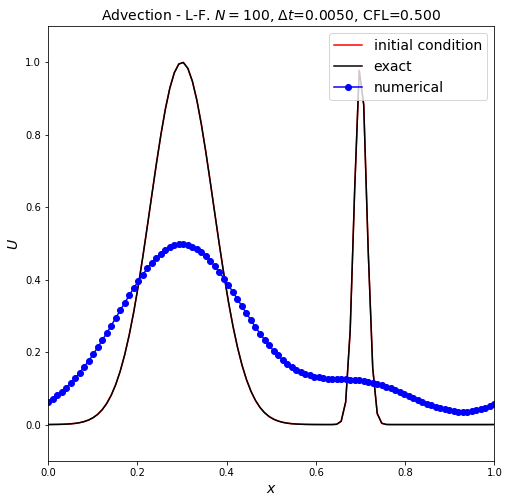

In [3]:
def adv_central_periodic(N):
    """ Function to generate the NxN discretisation matrix for advection
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (U / 2*dx).
    """
    Dx = np.eye(N, k=1) - np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dx[0, -1] = -1.
    Dx[-1, 0] = 1.
    return Dx

def diff_central_periodic(N):
    """ Function to generate the NxN discretisation matrix for diffusion
    using second-order central differences.
    
    NB. this version does not multiply through by the factor  (kappa / dx**2).
    """
    Dxx = np.eye(N, k=1) - 2*np.eye(N) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dxx[0, -1] = 1.
    Dxx[-1, 0] = 1.
    return Dxx

def L_F_time_periodic(N):
    """ Function to generate the NxN discretisation matrix 
    corresponding to the temporal component of the update formula
    """
    Dt = np.eye(N, k=1) + np.eye(N, k=-1)
    # Add in the wrapped values due to periodicity
    Dt[0, -1] = 1.
    Dt[-1, 0] = 1.
    return Dt

# solver from lecture based upon solving advection-diffusion problem
def solve_adv_Lax_Friedrichs(Uic, a, x, dx, dt, tend):
    """ Function to solve pure advection using the
    Lax-Friedrichs scheme.
    
    Implementation based on solution of a corresponding 
    advection-diffusion problem.
    
    Initial condition is given in Uic.
    
    Returns an array of solution in space-time.
    """
    # create discretisation matrices
    Dx = adv_central_periodic(len(x))
    Dxx = diff_central_periodic(len(x))
    # Form discretisation matrix be multiplying by the appropriate constants
    epsilon = dx**2/(2.0*dt)
    A = -(a / (2.0*dx)) * Dx  + epsilon * Dxx / dx**2
    # set up the fime levels assuming we start at t=0
    t = np.arange(0, tend, dt)
    # some space to store the solution in space-time
    U = np.empty((len(x), len(t)))
    # initialise with given initial condition
    U[:,0] = Uic

    # we can define the discretisation matrix once outside the time loop for
    # this linear problem with a fixed time step
    amp_factor = (np.eye(len(x)) + A * dt)
    for n in range(len(t)-1):
        U[:, n+1] = amp_factor @ U[:, n]
    return U

# new solver based on the fundamental L-F form
def solve_adv_Lax_Friedrichs2(Uic, a, x, dx, dt, tend):
    """ Function to solve pure advection using the
    Lax-Friedrichs scheme.

    Initial condition is given in Uic.
    
    Returns an array of solution in space-time.
    """
    # create discretisation matrices
    Dx = adv_central_periodic(len(x))
    Dt = L_F_time_periodic(N)
    # Form discretisation matrix be multiplying by the appropriate constants
    A = -(a / (2.0*dx)) * Dx
    # set up the fime levels assuming we start at t=0
    t = np.arange(0, tend, dt)
    # some space to store the solution in space-time
    U = np.empty((len(x), len(t)))
    # initialise with given initial condition
    U[:,0] = Uic

    # we can define the discretisation matrix once outside the time loop for
    # this linear problem with a fixed time step
    amp_factor = (0.5*Dt + A * dt)
    for n in range(len(t)-1):
        U[:, n+1] = amp_factor @ U[:, n]
    return U


# physical parameters
L = 1
a = 1

dt = 0.005
tend = 1

# define the spatial mesh so we can generate the IC.
N = 100
dx = L / N
x = np.linspace(0, L, N)

# define an initial condition
Uic = np.exp(-((x-0.3)/0.1)**2) + np.exp(-((x-0.7)/0.02)**2)  

# solve
#U = solve_adv_Lax_Friedrichs(Uic, a, x, dx, dt, tend)
U = solve_adv_Lax_Friedrichs2(Uic, a, x, dx, dt, tend)

fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.plot(x, np.exp(-((x-0.3)/0.1)**2) + np.exp(-((x-0.7)/0.02)**2), 'r-', label='initial condition')
ax1.plot(x, np.exp(-(( np.mod((x-a*tend),1) -0.3)/0.1)**2) + 
         np.exp(-(( np.mod((x-a*tend),1)-0.7)/0.02)**2), 'k-', label='exact')
ax1.plot(x, U[:,-1], 'bo-', label='numerical')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$U$', fontsize=14)
ax1.set_title(
        'Advection - L-F. $N=$%3i, $\Delta t$=%.4f, CFL=%.3f' 
    % (N, dt, a*dt/(L / N)), fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.legend(loc='best', fontsize=14);

## Homework - Lax-Wendroff for a general conservation law [$\star$]

In the lecture we noted that the Lax-Wendroff scheme for a general conservation law takes the form

$$u_i^{n+1} = u_i^n - \frac{\Delta t}{2 \Delta x} \left( f_{i+1}^n - f_{i-1}^n \right) + \frac{(\Delta t)^2}{2(\Delta x)^2} \left( J_{i+1/2}^n (f_{i+1}^n - f_i^n) - J_{i-1/2}^n ( f_i^n - f_{i-1}^n ) \right),$$

where $J_{i\pm 1/2} = J((x_i+x_{i\pm 1})/2)$ is the Jacobian evaluated at an intermediate location between grid points, which could be numerically approximated as $J_{i + 1/2} = (J_{i+1} + J_{i})/2$.  

Implement this form for this solver and compare your result against the solution we obtained with the solver specialised for the pure adection problem.

I.e. assuming a velocity of unity, the flux and Jacobian functions are given by

```Python
def flux_function(q):
    """ function to return the flux 
    """
    return q*np.ones_like(q)

def Jacobian_flux(q):
    return 1.0*np.ones_like(q)
```

Note for this implementation we can't in general assume that $f$ is linear and so we can't write our time-stepping update in terms of a simple matrix multiplication.

But we can write in vectorised for as something like

```Python
q[1:-1, n+1] = q[1:-1, n] - (dt / (2.0 * dx)) * ...
```
and then think about how to deal with the periodic boundaries separately.

### Solution - Lax-Wendroff for a general conservation law

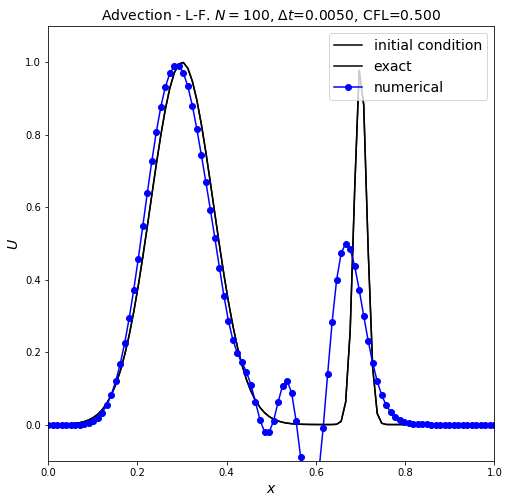

In [4]:
# Let's implement L-W in "long hand" for the generic cosnervation law
# to check our code.
def flux_function(q):
    """ function to return the flux 
    """
    return q*np.ones_like(q)

def Jacobian_flux(q):
    return 1.0*np.ones_like(q)

def solve_adv_Lax_Wendroff2(q_ic, x, dx, dt, tend):
    """ time step using upwind Lax-Wendroff
    """
    t = np.arange(0, tend, dt)

    # set up space to store entire solution (for plotting purposes)
    q = np.empty((len(x), len(t)))
    q[:, 0] = q_ic

    for n in range(len(t)-1):
        flux = flux_function(q[:, n])
        J = Jacobian_flux(q[:, n])
        q[1:-1, n+1] = q[1:-1, n] - (dt / (2.0 * dx)) * (flux[2:] - flux[:-2]) + (dt**2 / (4.0 * dx**2)) * (
            (J[2:] + J[1:-1]) * (flux[2:] - flux[1:-1]) - (J[1:-1] + J[:-2]) * (flux[1:-1] - flux[:-2]))
        # implement a periodic BC
        q[0, n+1] = q[0, n] - (dt / (2.0 * dx)) * (flux[1] - flux[-1]) + (dt**2 / (4.0 * dx**2)) * (
            (J[1] + J[0]) * (flux[1] - flux[0]) - (J[0] + J[-1]) * (flux[0] - flux[-1]))
        q[-1, n+1] = q[-1, n] - (dt / (2.0 * dx)) * (flux[0] - flux[-2]) + (dt**2 / (4.0 * dx**2)) * (
            (J[0] + J[-1]) * (flux[0] - flux[-1]) - (J[-1] + J[-2]) * (flux[-1] - flux[-2]))
    return q


# physical parameters
L = 1
a = 1

# define the spatial mesh so we can generate the IC.
N = 100
dx = L / N
x = np.linspace(0, L, N)

dt = 0.005
tend = 1

# define an initial condition
q_ic = np.exp(-((x-0.3)/0.1)**2) + np.exp(-((x-0.7)/0.02)**2)  

# solve
q = solve_adv_Lax_Wendroff2(q_ic, x, dx, dt, tend)

fig = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(111)
ax1.plot(x, np.exp(-((x-0.3)/0.1)**2) + np.exp(-((x-0.7)/0.02)**2), 'k-', label='initial condition')
ax1.plot(x, np.exp(-(( np.mod((x-a*tend),1) -0.3)/0.1)**2) 
         + np.exp(-(( np.mod((x-a*tend),1)-0.7)/0.02)**2), 'k-', label='exact')
ax1.plot(x, q[:,-1], 'bo-', label='numerical')
ax1.set_xlabel('$x$', fontsize = 14)
ax1.set_ylabel('$U$', fontsize = 14)
ax1.set_title(
        'Advection - L-F. $N=$%3i, $\Delta t$=%.4f, CFL=%.3f' 
        % (N, dt, a*dt/(L / N)), fontsize = 14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.legend(loc='best', fontsize = 14);

## Homework - Implement a finite volume based upwind method

Implement a finite volume based implementation of upwind and compare your result (in the eyeball norm) against the finite difference based implementation from the lecture for pure advection of a Gaussian in a periodic domain.

### Solution - Implement a finite volume based upwind method

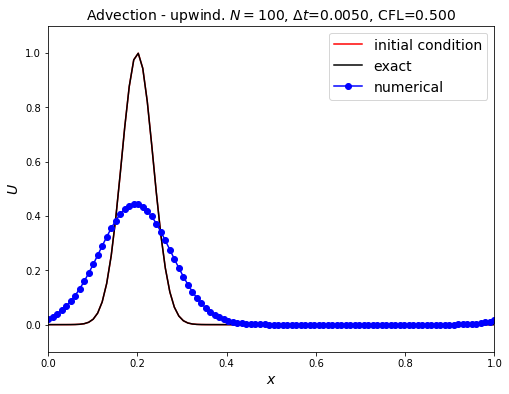

In [5]:
# finite difference code from the lecture

def adv_upwind_periodic(N):
    """ Function to generate the NxN discretisation matrix for advection
    using upwind differences and assuming periodic boundary conditions.
    
    NB. this version does not multiply through by the factor  (U / dx).
    """
    Dx = np.eye(N, k=0) - np.eye(N, k=-1)
    # Add in the wrapped value due to periodicity
    Dx[0, -1] = -1
    return Dx


def solve_adv_upwind(Uic, a, x, dx, dt, tend):
    """ Function to solve pure advection using upwind in space,
    forward Euler in time, periodic boundaries.
    
    Initial condition is given in Uic.
    
    Returns an array of solution in space-time.
    """
    # create discretisation matrix
    Dx = adv_upwind_periodic(len(x))
    # multiply by the appropriate constant
    A = -(a / dx) * Dx
    # set up the fime levels assuming we start at t=0
    t = np.arange(0, tend, dt)
    # some space to store the solution in space-time
    U = np.empty((len(x), len(t)))
    # initialise with given initial condition
    U[:,0] = Uic

    # we can define the discretisation matrix once outside the time loop for
    # this linear problem with a fixed time step
    amp_factor = (np.eye(len(x)) + A * dt)
    for n in range(len(t)-1):
        U[:, n+1] = amp_factor @ U[:, n]
    return U


# physical parameters
L = 1
a = 1

dt = 0.005
tend = 1.0

# define the spatial mesh so we can generate the IC.
N = 100
dx = L / N
x = np.linspace(0, L, N)

# define an initial condition - a Gaussian
Uic = np.exp(-((x-0.2)/0.05)**2)

# solve
U = solve_adv_upwind(Uic, a, x, dx, dt, tend)

# plot final solution compared with exact solution (a translation of the initial condition!)
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(x, np.exp(-((x-0.2)/0.05)**2), 'r-', label='initial condition')
# for exact solution at time tend, replace x in initial condition function with "x-a*tend"
ax1.plot(x, np.exp(-(( np.mod((x-a*tend),1) -0.2)/0.05)**2), 'k-', label='exact')
ax1.plot(x, U[:,-1], 'bo-', label='numerical')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$U$', fontsize=14)
ax1.set_title(
        'Advection - upwind. $N=$%3i, $\Delta t$=%.4f, CFL=%.3f' 
            % (N, dt, a*dt/(L / N)), fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.legend(loc='best', fontsize=14);

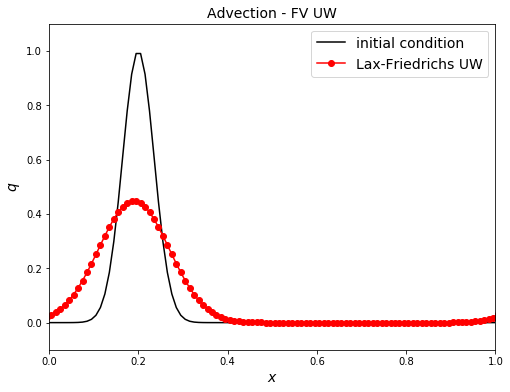

In [6]:
# a FV version

def flux_function(q):
    """ function to return the flux for pure advection
    """
    a = 1.
    return a*q

def solve_FV_UW(Q_ic, x, dx, dt, tend):
    """ time step using the
    finite volume method using the upwind flux
    """
    t = np.arange(0, tend, dt)

    Q = np.empty((len(x), len(t)))
    Q[:, 0] = Q_ic

    for n in range(len(t)-1):
        flux = flux_function(Q[:, n])
        Q[1:-1, n+1] = Q[1:-1, n] - (dt / dx)*( (flux[1:-1] - flux[:-2]) )
        # set ghost cell values to enforce periodicity
        Q[0, n+1] = Q[-2,n]
        Q[-1, n+1] = Q[1,n]
    return Q



# physical parameters
L = 1
a = 1

dt = 0.005
tend = 1.0

# define the spatial mesh so we can generate the IC.
N = 100
dx = L / N
x = np.arange(-dx / 2.0, L + dx / 2.0 + 1e-10, dx)
# stagger by dx/2, and introduce a "ghost cell" at the left and right


# define an initial condition - a Gaussian
Q_ic = np.exp(-((x-0.2)/0.05)**2)

# solve
Q_uw = solve_FV_UW(Q_ic, x, dx, dt, tend)


fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(x, Q_ic, 'k-', label='initial condition')
ax1.plot(x, Q_uw[:, -1], 'ro-', label='Lax-Friedrichs UW')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$q$', fontsize=14)
ax1.set_title('Advection - FV UW', fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.1)
ax1.legend(loc='best', fontsize=14);

## Homework - Checking for consistency between FD and FV implementations of LF in 1D [$\star$]

We have claimed that our finite volume code with the Lax-Friedrichs numerical flux should be equivalent with the results from the finite difference implementation of the Lax-Friedrichs method.

Check this in the eye-ball norm for one of our example applications considered in the lecture, e.g. `q_ic = 0.4 * traffic_flow_IC_1(x)`.

### Solution - Checking for consistency between FD and FV implementations in 1D

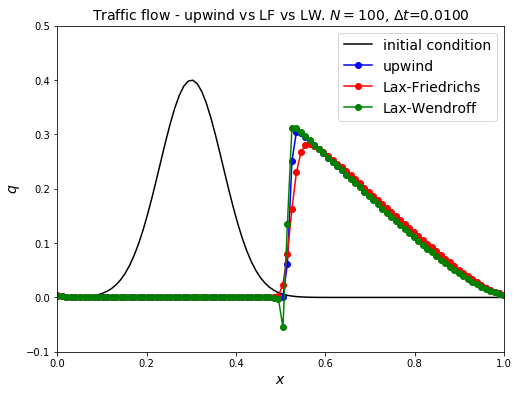

In [7]:
# First the FD code copied from the lecture

def flux_function(q):
    """ function to return the flux for the traffic flow example
    """
    return (1.0 - q) * q

def Jacobian_flux(q):
    """ function to return the Jacobian of the flux for the traffic flow example
    """
    return (1.0 - 2.0 * q)

def solve_upwind(q_ic, x, dx, dt, tend):
    """ Function to time step 
    using upwind (backward looking)
    """ 
    t = np.arange(0, tend, dt)

    q = np.empty((len(x), len(t)))
    q[:,0] = q_ic

    for n in range(len(t)-1):
        flux = flux_function(q[:,n])
        # we're not assuming linear system now so write out in long hand rather
        # than the use of Dx discrerisation matrix as for simple advection
        q[1:, n+1] = q[1:,n] - (dt / dx) * ( flux[1:] - flux[:-1] )
        # periodic BC - one sided stencil so only needed at left hand boundary
        q[0, n+1] = q[0,n] - (dt / dx) * ( flux[0] - flux[-1] )
    return q

def solve_Lax_Friedrichs(q_ic, x, dx, dt, tend):
    """ time step using Lax-Friecrichs
    """
    t = np.arange(0, tend, dt)

    # set up space to store entire solution (for plotting purposes)
    q = np.empty((len(x), len(t)))
    q[:, 0] = q_ic

    for n in range(len(t)-1):
        flux = flux_function(q[:, n])
        # we're not assuming linear system now so write out in long hand rather
        # than the use of Dx discrerisation matrix as for simple advection
        q[1:-1, n+1] = 0.5 * (q[:-2, n] + q[2:, n]) - 0.5 * (dt / dx) * (flux[2:] - flux[:-2])
        # period BC
        q[0, n+1] = 0.5 * (q[-1, n] + q[1, n]) - 0.5 * (dt / dx) * (flux[1] - flux[-1])
        q[-1, n+1] = 0.5 * (q[-2, n] + q[0, n]) - 0.5 * (dt / dx) * (flux[0] - flux[-2])        
    return q


def solve_Lax_Wendroff(q_ic, x, dx, dt, tend):
    """ time step using Lax-Wendroff
    """
    t = np.arange(0, tend, dt)

    # set up space to store entire solution (for plotting purposes)
    q = np.empty((len(x), len(t)))
    q[:, 0] = q_ic

    for n in range(len(t)-1):
        flux = flux_function(q[:, n])
        J = Jacobian_flux(q[:, n])
        q[1:-1, n+1] = q[1:-1, n] - (dt / (2.0 * dx)) * (flux[2:] - flux[:-2]) + (dt**2 / (4.0 * dx**2)) * (
            (J[2:] + J[1:-1]) * (flux[2:] - flux[1:-1]) - (J[1:-1] + J[:-2]) * (flux[1:-1] - flux[:-2]))
        # implement a periodic BC
        q[0, n+1] = q[0, n] - (dt / (2.0 * dx)) * (flux[1] - flux[-1]) + (dt**2 / (4.0 * dx**2)) * (
            (J[1] + J[0]) * (flux[1] - flux[0]) - (J[0] + J[-1]) * (flux[0] - flux[-1]))
        q[-1, n+1] = q[-1, n] - (dt / (2.0 * dx)) * (flux[0] - flux[-2]) + (dt**2 / (4.0 * dx**2)) * (
            (J[0] + J[-1]) * (flux[0] - flux[-1]) - (J[-1] + J[-2]) * (flux[-1] - flux[-2]))
    return q


def traffic_flow_IC_1(x):
    """ An initial condition for the first traffic flow example
    """
    q_ic = np.zeros_like(x)
    q_ic = 1.0 * np.exp(-((x - 0.3)/0.1)**2)
    return q_ic


# physical parameters
dt = 0.01
tend = 0.5

# define the spatial mesh so we can generate the IC.
L = 1
N = 100
dx = L / N
x = np.linspace(0, L, N)

# define an initial condition
q_ic = 0.4 * traffic_flow_IC_1(x)

# solve
q_uw = solve_upwind(q_ic, x, dx, dt, tend)
q_lf = solve_Lax_Friedrichs(q_ic, x, dx, dt, tend)
q_lw = solve_Lax_Wendroff(q_ic, x, dx, dt, tend)

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(x, q_ic, 'k-', label='initial condition')
ax1.plot(x, q_uw[:, -1], 'bo-', label='upwind')
ax1.plot(x, q_lf[:, -1], 'ro-', label='Lax-Friedrichs')
ax1.plot(x, q_lw[:, -1], 'go-', label='Lax-Wendroff')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$q$', fontsize=14)
ax1.set_title(
    'Traffic flow - upwind vs LF vs LW. $N=$%3i, $\Delta t$=%.4f' % (N, dt), fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 0.5)
ax1.legend(loc='best', fontsize=14);

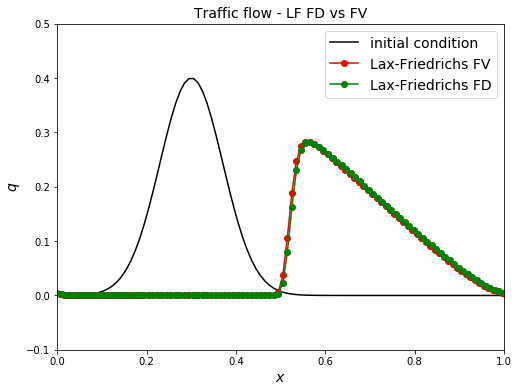

In [8]:
# Now the FV code

def flux_function(q):
    """ function to return the flux for the traffic flow example
    """
    return (1.0 - q) * q

def solve_FV_LF(Q_ic, x, dx, dt, tend):
    """ time step using the
    finite volume method using the Lac-Friedrichs flux
    """
    t = np.arange(0, tend, dt)

    Q = np.empty((len(x), len(t)))
    Q[:, 0] = Q_ic

    for n in range(len(t)-1):
        flux = flux_function(Q[:, n])
        # How we wrote previously in `def solve_Lax_Friedrichs`
        # Q[1:-1, n+1] = 0.5 * (Q[:-2, n] + Q[2:, n]) - 0.5 * (dt / dx) * (flux[2:] - flux[:-2])
        # Now written in terms of the numerical flux function
        Q[1:-1, n+1] = Q[1:-1, n] - (dt / dx)*( 
            (0.5*(flux[1:-1] + flux[2:]) - (dx/(2*dt))*(Q[2:, n] - Q[1:-1, n])) - 
            (0.5*(flux[:-2] + flux[1:-1]) - (dx/(2*dt))*(Q[1:-1, n] - Q[:-2, n])) )
        # set ghost cell values to enforce periodicity
        Q[0, n+1] = Q[-2,n]
        Q[-1, n+1] = Q[1,n]
    return Q

# physical parameters
dt = 0.01
tend = 0.5

# define the spatial mesh so we can generate the IC.
L = 1
N = 100
dx = L / N
x = np.arange(-dx / 2.0, L + dx / 2.0 + 1e-10, dx)
# stagger by dx/2, and introduce a "ghost cell" at the left and right


# define an initial condition
Q_ic = 0.4*traffic_flow_IC_1(x)

# solve
Q_lf = solve_FV_LF(Q_ic, x, dx, dt, tend)


fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(x, Q_ic, 'k-', label='initial condition')
ax1.plot(x, Q_lf[:, -1], 'ro-', label='Lax-Friedrichs FV')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$q$', fontsize=14)
ax1.set_title('Traffic flow - LF FD vs FV', fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 0.5)

# add the FD result from above onto these axes.
x = np.linspace(0, L, N)
ax1.plot(x, q_lf[:, -1], 'go-', label='Lax-Friedrichs FD')
ax1.legend(loc='best', fontsize=14);

## Homework - Compare FV based UW, LF, LFF  [$\star$]

Compare our FV codes with UW, LF and LFF fluxes for the problem with ```Q_ic = 0.4*traffic_flow_IC_1(x)```

What happens when you increase the factor from 0.4 to a value above 0.5?

### Solution - Compare FV based UW, LF, LFF

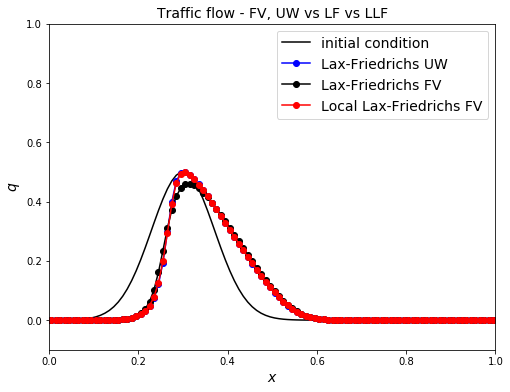

In [9]:
# Now the FV code

def flux_function(q):
    """ function to return the flux for the traffic flow example
    """
    return (1.0 - q) * q

def Jacobian_flux(q):
    """ function to return the Jacobian of the flux for the traffic flow example
    """
    return (1.0 - 2.0 * q)

def solve_FV_LLF(Q_ic, x, dx, dt, tend):
    """ time step using the
    finite volume method using the LOCAL Lac-Friedrichs flux
    """
    t = np.arange(0, tend, dt)

    Q = np.empty((len(x), len(t)))
    Q[:, 0] = Q_ic

    for n in range(len(t)-1):
        flux = flux_function(Q[:, n])
        J = Jacobian_flux(Q[:, n])
        Q[1:-1, n+1] = Q[1:-1, n] - (dt / dx)*( 
            0.5*(flux[1:-1] + flux[2:] - np.maximum(np.abs(J[1:-1]),np.abs(J[2:]))*(Q[2:, n] - Q[1:-1, n])) - 
            0.5*(flux[:-2] + flux[1:-1] - np.maximum(np.abs(J[:-2]),np.abs(J[1:-1]))*(Q[1:-1, n] - Q[:-2, n])) )
        # set ghost cell values to enforce periodicity
        Q[0, n+1] = Q[-2,n]
        Q[-1, n+1] = Q[1,n]
    return Q

# physical parameters
dt = 0.01
tend = 0.1

# define the spatial mesh so we can generate the IC.
L = 1
N = 100
dx = L / N
x = np.arange(-dx / 2.0, L + dx / 2.0 + 1e-10, dx)
# stagger by dx/2, and introduce a "ghost cell" at the left and right


# define an initial condition
Q_ic = 0.5*traffic_flow_IC_1(x)
# this is where we start to see some problems with the one-sided implementation of UW
#Q_ic = 0.68*traffic_flow_IC_1(x)

# solve
Q_uw = solve_FV_UW(Q_ic, x, dx, dt, tend)
Q_lf = solve_FV_LF(Q_ic, x, dx, dt, tend)
Q_llf = solve_FV_LLF(Q_ic, x, dx, dt, tend)

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(111)
ax1.plot(x, Q_ic, 'k-', label='initial condition')
ax1.plot(x, Q_uw[:, -1], 'bo-', label='Lax-Friedrichs UW')
ax1.plot(x, Q_lf[:, -1], 'ko-', label='Lax-Friedrichs FV')
ax1.plot(x, Q_llf[:, -1], 'ro-', label='Local Lax-Friedrichs FV')
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_ylabel('$q$', fontsize=14)
ax1.set_title('Traffic flow - FV, UW vs LF vs LLF', fontsize=14)
ax1.set_xlim(0, 1)
ax1.set_ylim(-0.1, 1.)
ax1.legend(loc='best', fontsize=14);